# Predicting real estate price based on surface and arrondissement

First view of the dataframe 

    price  surface  arrondissement
0   1820     46.1             1.0
1   1750     41.0             1.0
2   1900     55.0             1.0
3   1950     46.0             1.0
4   1950     49.0             1.0


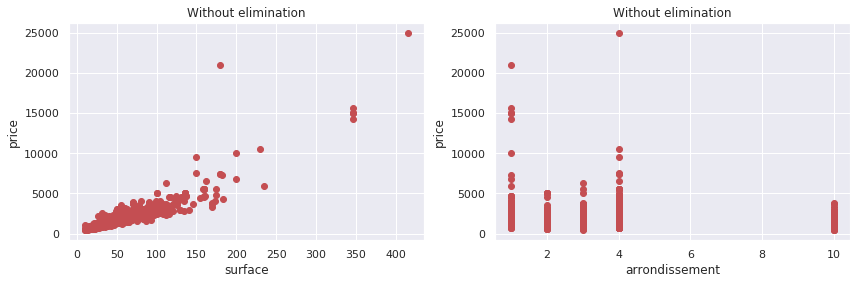

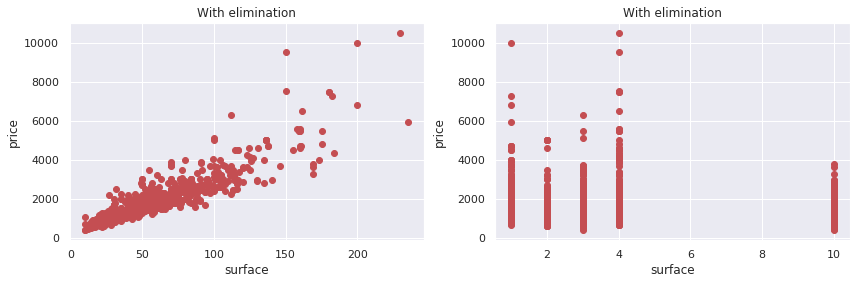

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

house_data = pd.read_csv('house_data.csv')
house_data.dropna(inplace = True)

print(f'First view of the dataframe \n\n {house_data.head()}')

fig = plt.figure(figsize=(14, 4))

ax1 = fig.add_subplot(1, 2, 1)
ax1.set_ylabel('price')
ax1.set_xlabel('surface')
plt.title("Without elimination")
plt.plot(house_data['surface'], house_data['price'], 'ro')

ax2 = fig.add_subplot(1, 2, 2)
ax2.set_ylabel('price')
ax2.set_xlabel('arrondissement')
plt.title("Without elimination")
plt.plot(house_data['arrondissement'], house_data['price'], 'ro')

plt.subplots_adjust(wspace=0.2, hspace=1)
plt.show(fig)

# Dropping out of range values
house_data = house_data[house_data['price'] < 12000]

fig = plt.figure(figsize=(14, 4))

ax1 = fig.add_subplot(1, 2, 1)
ax1.set_ylabel('price')
ax1.set_xlabel('surface')
plt.title("With elimination")
plt.plot(house_data['surface'], house_data['price'], 'ro')

ax2 = fig.add_subplot(1, 2, 2)
ax2.set_ylabel('price')
ax2.set_xlabel('surface')
plt.title("With elimination")
plt.plot(house_data['arrondissement'], house_data['price'], 'ro')

plt.subplots_adjust(wspace=0.2)
plt.show(fig)

x = house_data[['surface', 'arrondissement']]
y = house_data['price']
tot_error = []

__Comparing to mean value__

In [2]:
errors = []
for i in range(100):
    xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size=0.8, test_size=0.2)
    mean = np.mean(ytrain)
    error_loc = mean_squared_error(ytest.values, [mean]*len(ytest))
    errors.append(error_loc)

error = np.mean(errors)
print(f'Mean error {np.sqrt(error)}')
tot_error.append(error)

Mean error 1209.3337684604226


__Base : Classic Linear Regression__

In [3]:
scoring = []
errors = []
for i in range(100):
    xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size=0.8, test_size=0.2)
    regr1 = linear_model.LinearRegression()
    regr1.fit(xtrain['surface'].to_frame(), ytrain)
    scoring.append(regr1.score(xtest['surface'].to_frame(), ytest))
    errors.append(mean_squared_error(ytest.values, regr1.predict(xtest['surface'].to_frame())))
#plt.plot(range(100), scoring)
#plt.show()
stats = [min(scoring), np.mean(scoring), max(scoring)]
#print('On a 100 spliting, we have a fitting score of the 1-feature linear regression of\n'
#     f' min {stats[0]}\n mean {stats[1]}\n max {stats[2]} ')
error = np.mean(errors)
print('\n Mean error', np.sqrt(error))
tot_error.append(error)


 Mean error 535.8834933977914


__First idea : 2-features linear regression__

In [4]:
# It can't to any harm to add a feature eventhough it may not be at all linear following the 'arrondissement' feature
# In the worst case, the coefficient in front of arrondissement will be 0 and we'll be back to 1-feature
scoring = []
errors = []
for i in range(100):
    xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size=0.8, test_size=0.2)
    regr1 = linear_model.LinearRegression()
    regr1.fit(xtrain, ytrain)
    scoring.append(regr1.score(xtest, ytest))
    errors.append(mean_squared_error(ytest.values, regr1.predict(xtest)))
#plt.plot(range(100), scoring)
#plt.show()
stats = [min(scoring), np.mean(scoring), max(scoring)]
#print('On a 100 spliting, we have a fitting score of the 2-feature linear regression of\n'
#     f' min {stats[0]}\n mean {stats[1]}\n max {stats[2]} ')
error = np.mean(errors)
print('\n Mean error', np.sqrt(error))
tot_error.append(error)


 Mean error 499.0285763125242


__Second idea : Operate a linear regression inside the substets given by the arrondissement feature__

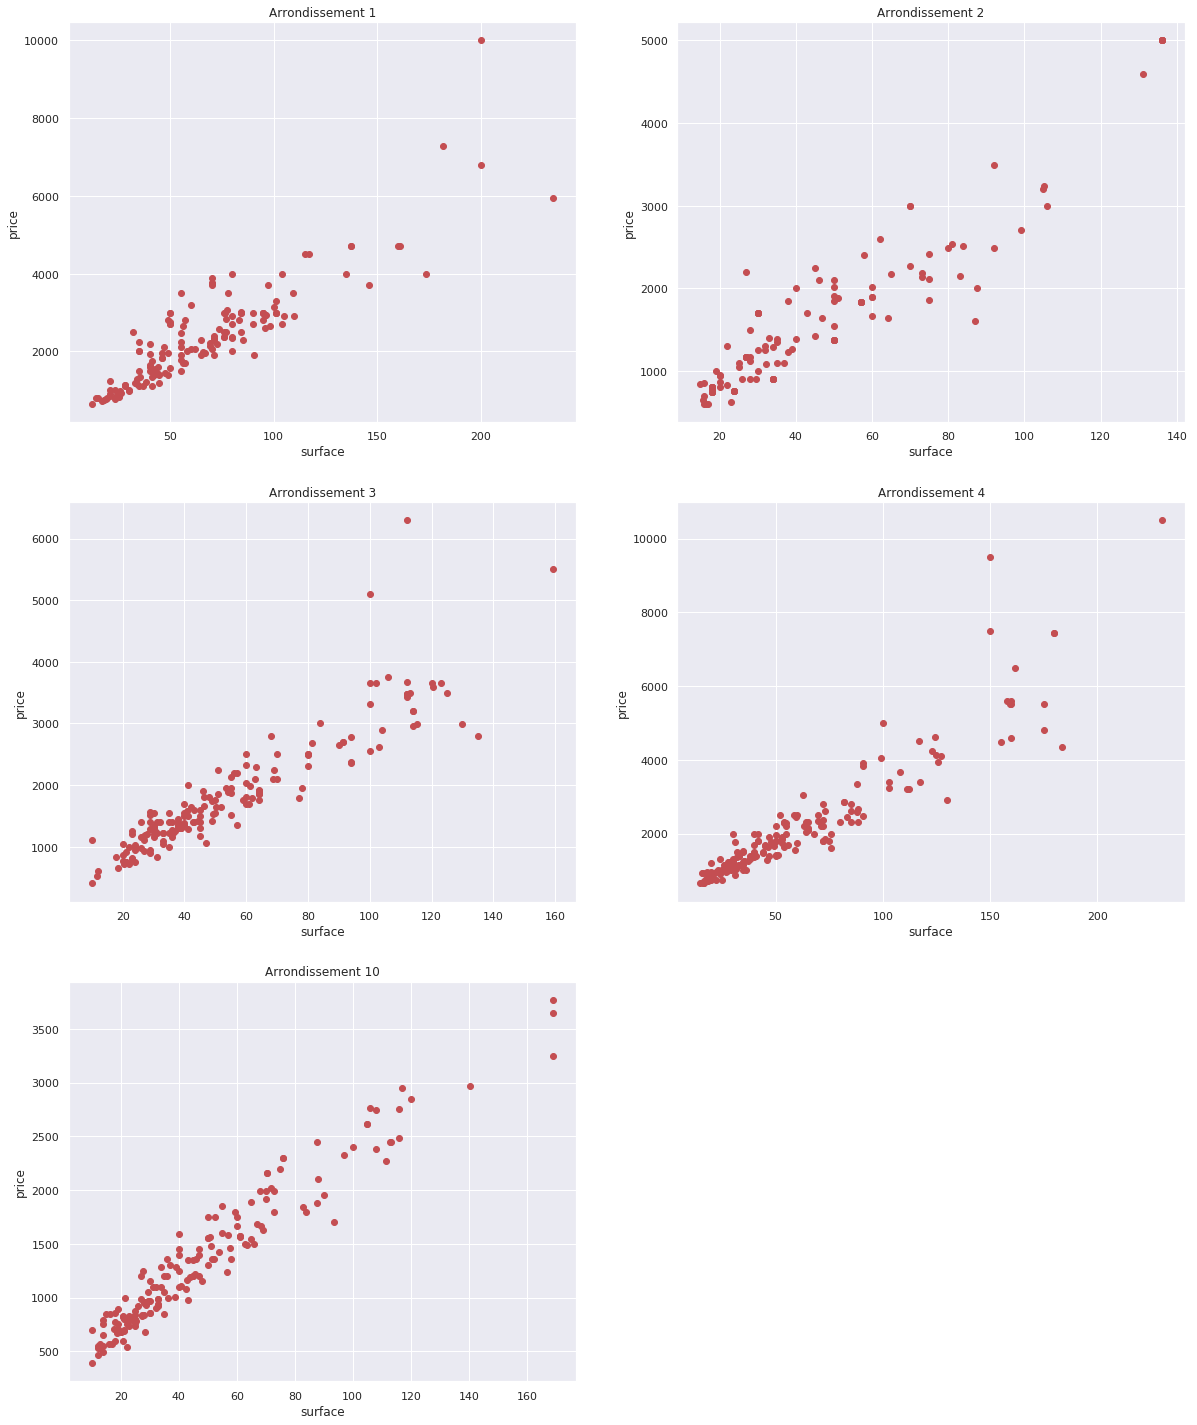

In [5]:
# View of each subsets

arrondissements = np.unique(xtrain['arrondissement']).astype(int)

fig = plt.figure(figsize=(20, 25))

for i in range(len(arrondissements)):
    xi = x[x['arrondissement'] == arrondissements[i]]['surface']
    yi = y[x['arrondissement'] == arrondissements[i]]
    ax = fig.add_subplot(3, 2, i+1)
    plt.plot(xi, yi, 'ro')
    ax.set_ylabel('price')
    ax.set_xlabel('surface')
    plt.title(f"Arrondissement {arrondissements[i]}")
    
plt.show()

In [6]:
# Dropping out of range values

house_data2 = house_data.query('(arrondissement == 1 & price < 5500) or (arrondissement == 2 & price < 4000)'
                'or (arrondissement == 3 & price < 5000) or (arrondissement == 4 and surface < 145)'
                'or (arrondissement == 10)')

x2 = house_data2[['surface', 'arrondissement']]
y2 = house_data2['price']

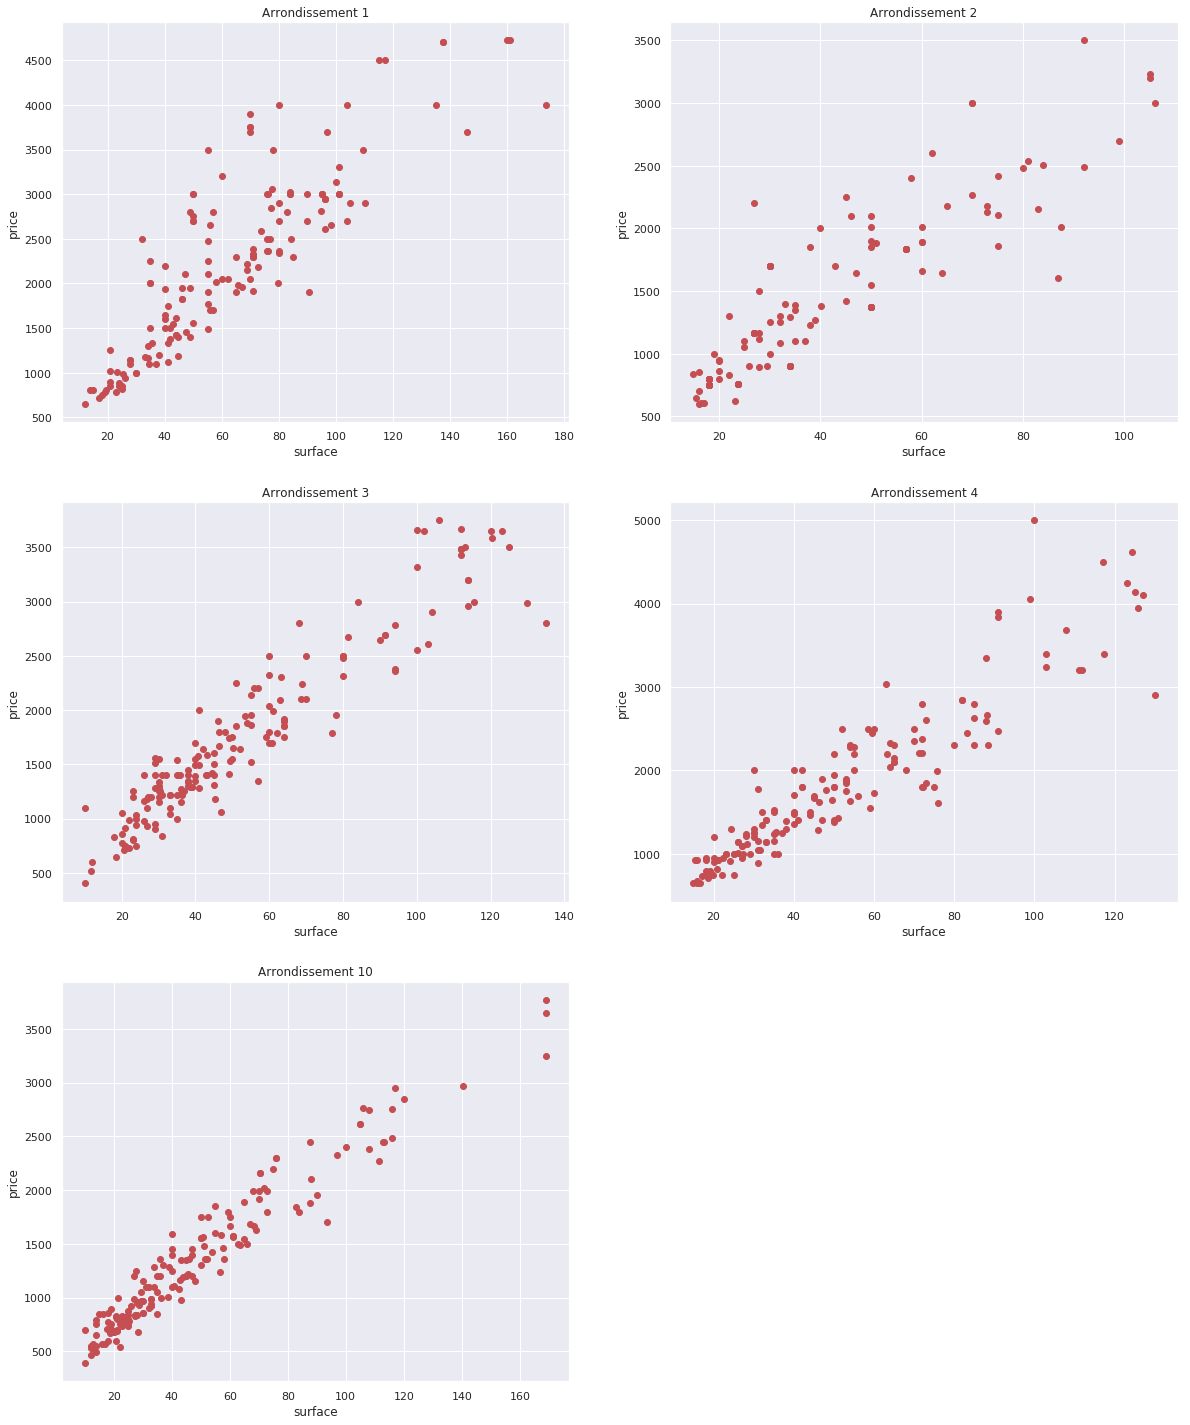

In [7]:
# View of each subsets after droping out of range values

arrondissements = np.unique(xtrain['arrondissement']).astype(int)

fig = plt.figure(figsize=(20, 25))

for i in range(len(arrondissements)):
    xi = x2[x2['arrondissement'] == arrondissements[i]]['surface']
    yi = y2[x2['arrondissement'] == arrondissements[i]]
    ax = fig.add_subplot(3, 2, i+1)
    plt.plot(xi, yi, 'ro')
    ax.set_ylabel('price')
    ax.set_xlabel('surface')
    plt.title(f"Arrondissement {arrondissements[i]}")
    
plt.show()

In [8]:
# Core of the regression

scoring = []
errors = []
for i in range(100):
    xtrain, xtest, ytrain, ytest = train_test_split(x2, y2, train_size=0.8, test_size=0.2)

    x_arr = {i : xtrain[xtrain['arrondissement'] == i] for i in arrondissements}
    y_arr = {i : ytrain[xtrain['arrondissement'] == i] for i in arrondissements}

    xtest_arr = {i : xtest[xtest['arrondissement'] == i] for i in arrondissements}
    ytest_arr = {i : ytest[xtest['arrondissement'] == i] for i in arrondissements}
    scoring_loc = []
    errors_loc = []
    regressions = {}
    for i in arrondissements:
        xi = x_arr[i]['surface']
        yi = y_arr[i]
        regressions[f'regr{i}'] = linear_model.LinearRegression()
        reg_loc = regressions[f'regr{i}']
        reg_loc.fit(xi.to_frame(), yi)
        scoring_loc.append(reg_loc.score(xtest_arr[i]['surface'].to_frame(), ytest_arr[i]))
        errors_loc.append(mean_squared_error(ytest_arr[i].values, reg_loc.predict(xtest_arr[i]['surface'].to_frame())))
        
    scoring.append(scoring_loc)
    errors.append(errors_loc)
    
mean_scoring_arr = [np.mean(np.array(scoring)[:,i]) for i in range(len(scoring[0]))]
mean_scoring = np.mean(mean_scoring_arr)
#s = [np.mean(scoring[i]) for i in range(len(scoring))]

#stats = [min(s), np.mean(s), max(s)]
#print('On a 100 spliting, we have a fitting score of the 2-feature linear regression of\n'
#     f' min {stats[0]}\n mean {stats[1]}\n max {stats[2]} ')
error_arr = [np.mean(np.array(errors)[:,i]) for i in range(len(errors[0]))]
error = np.mean(error_arr)
print('\n Mean error', np.sqrt(error))
tot_error.append(error)


 Mean error 341.0398568917179


In [9]:
# Recap

tot_error = np.sqrt(tot_error)
print('Here is as recap of each methods effectiveness\n\n'
     f'Comparing to mean value : mean error of {"%.2f" % tot_error[0]}\n'
     f'1-feature linear regression : mean error of {"%.2f" % tot_error[1]}\n'
     f'2-features linear regression : mean error of {"%.2f" % tot_error[2]}\n'
     f'Subsets linear regression : mean error of {"%.2f" % tot_error[3]}\n')

Here is as recap of each methods effectiveness

Comparing to mean value : mean error of 1209.33
1-feature linear regression : mean error of 535.88
2-features linear regression : mean error of 499.03
Subsets linear regression : mean error of 341.04



__The last model ie subsets linear regression shows the best performances.__

It would be hard to implement it on a data frame with more features though because of the number of regression we would have to create for each set of possibilities (if we had a feature house or appartment added, it would double the number of regressions having to be trained, and reducing number of examples in each subsets)